Loading abstract graph from: E:\Network Science Project\01_Louvain_method - other big files\RealData\3_abstract_community_network.gexf
Plot saved to: E:\Network Science Project\01_Louvain_method\top_10_stacks_network.png


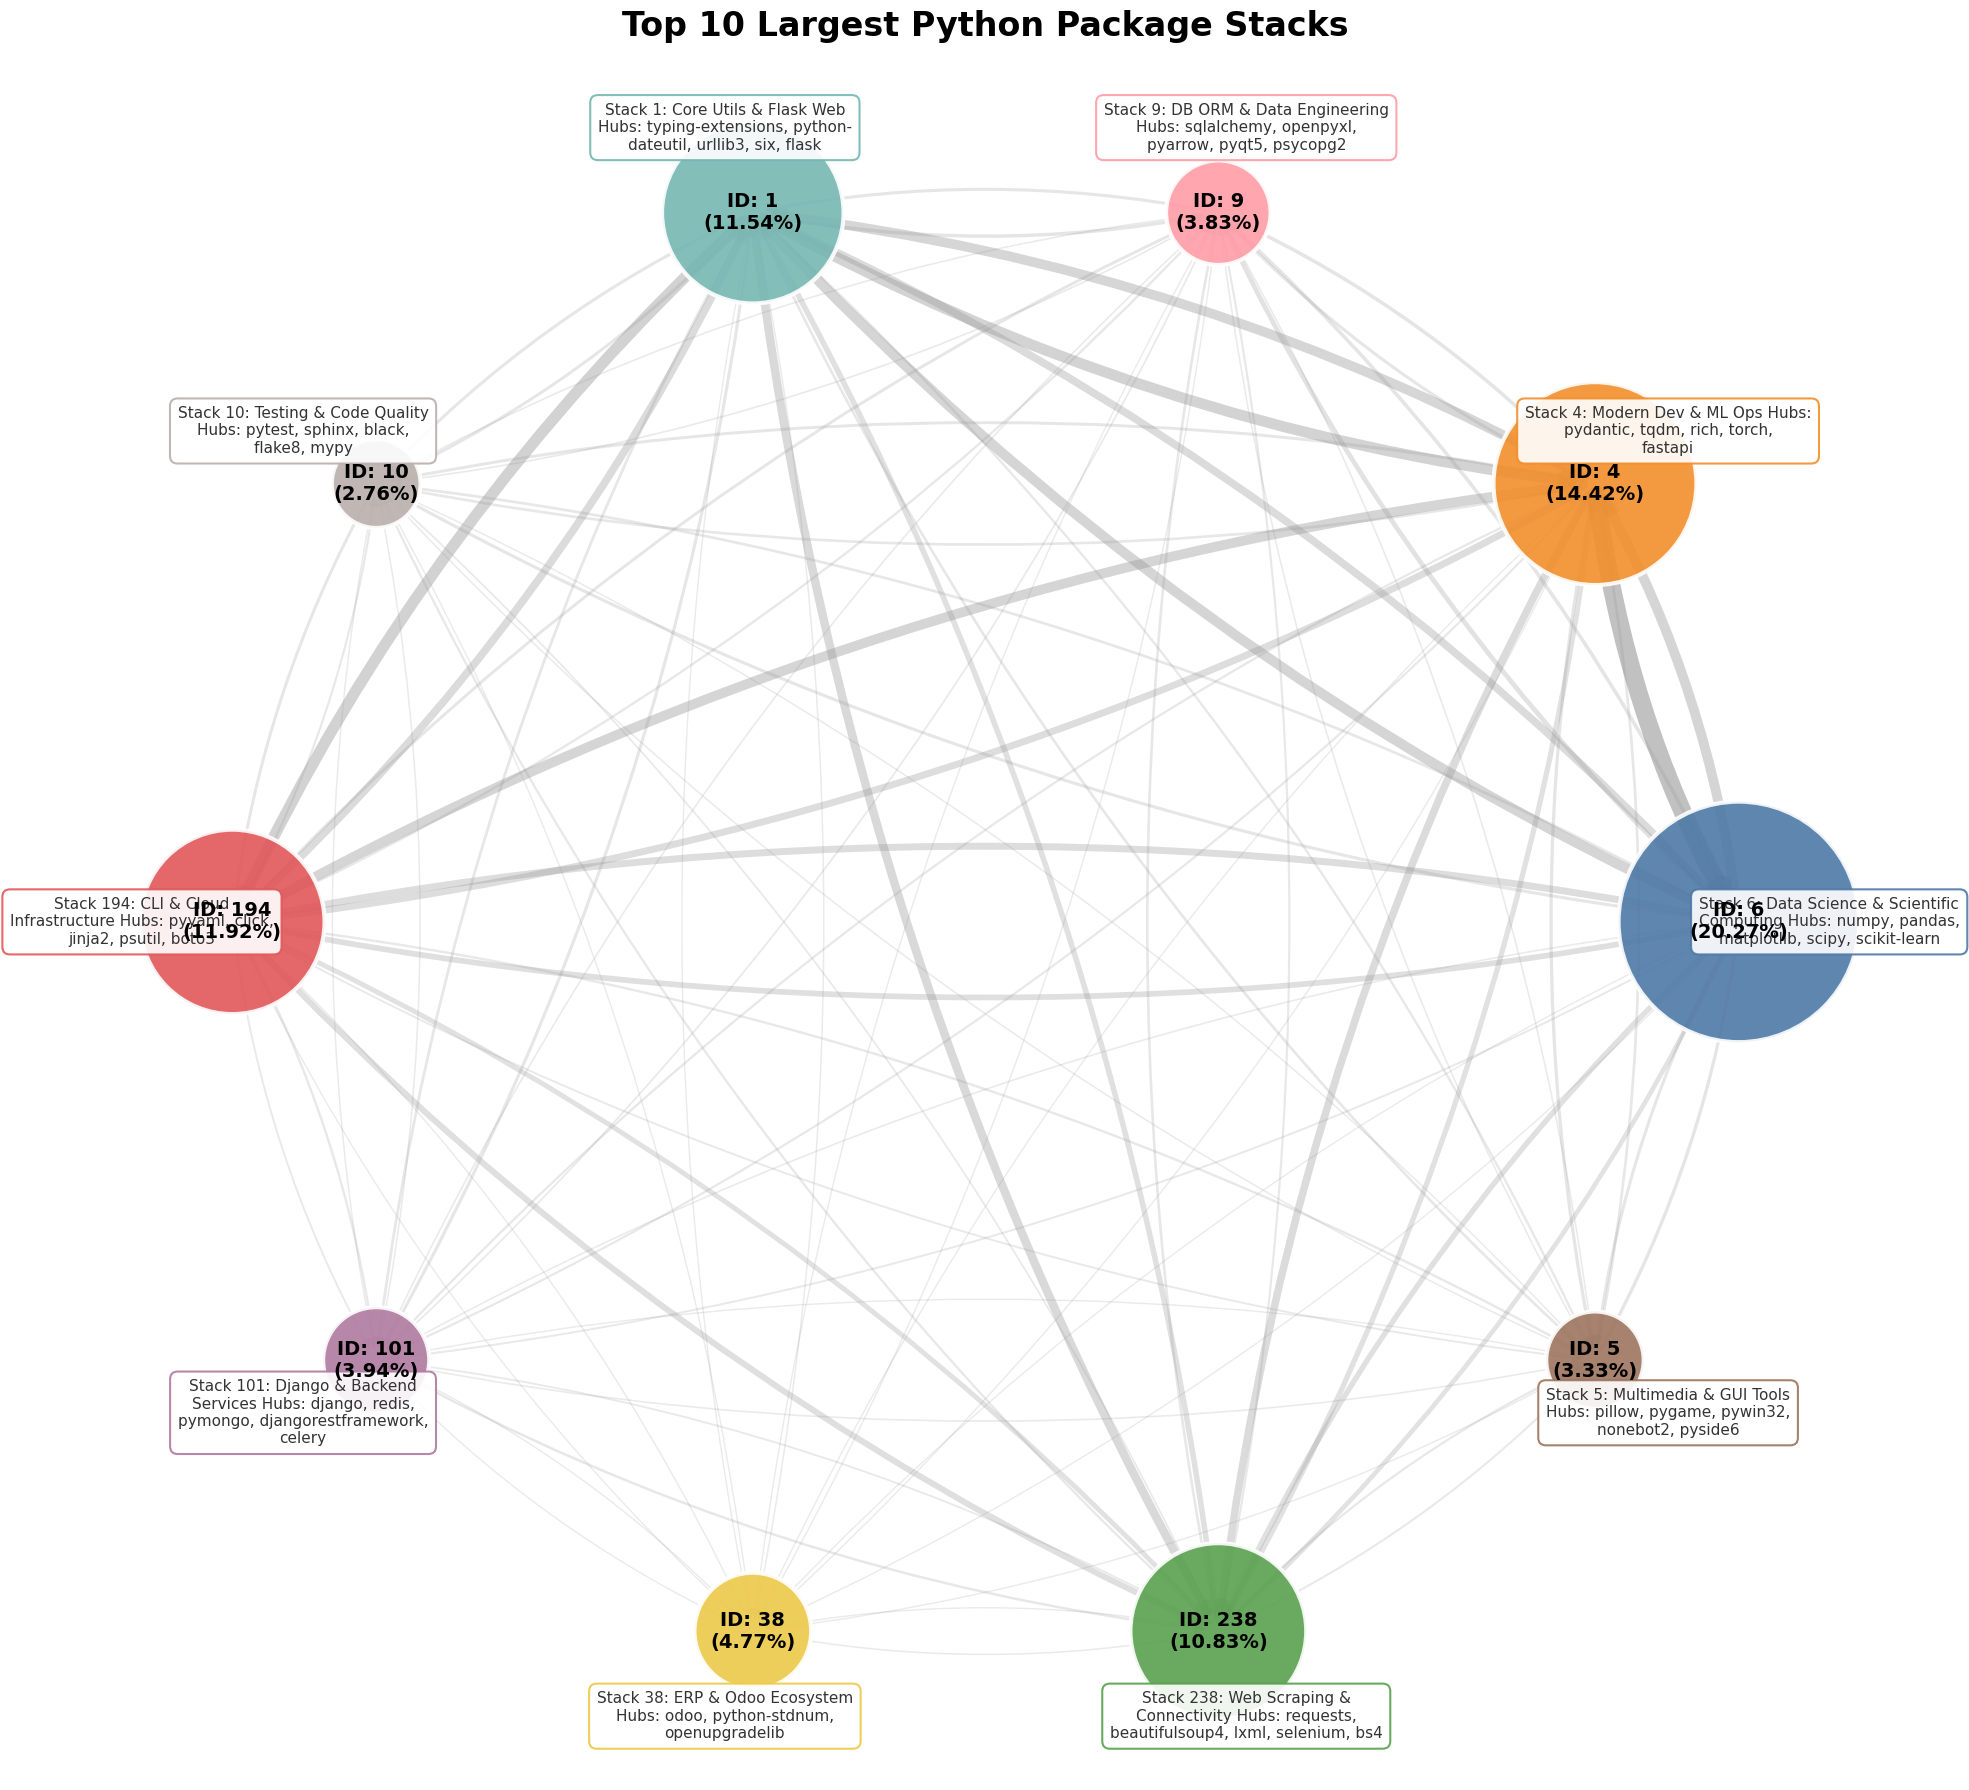

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import textwrap


DATA_DIR = r"E:\Network Science Project\01_Louvain_method - other big files\RealData"
OUTPUT_DIR = r"E:\Network Science Project\01_Louvain_method"
GEXF_FILE = "3_abstract_community_network.gexf"
TOP_K = 10 


STACK_DETAILS = {
    '6': {
        'title': 'Data Science & Scientific Computing', 
        'share': '20.27%', 
        'hubs': ['numpy', 'pandas', 'matplotlib', 'scipy', 'scikit-learn']
    },
    '4': {
        'title': 'Modern Dev & ML Ops', 
        'share': '14.42%', 
        'hubs': ['pydantic', 'tqdm', 'rich', 'torch', 'fastapi']
    },
    '194': {
        'title': 'CLI & Cloud Infrastructure', 
        'share': '11.92%', 
        'hubs': ['pyyaml', 'click', 'jinja2', 'psutil', 'boto3']
    },
    '1': {
        'title': 'Core Utils & Flask Web', 
        'share': '11.54%', 
        'hubs': ['typing-extensions', 'python-dateutil', 'urllib3', 'six', 'flask']
    },
    '238': {
        'title': 'Web Scraping & Connectivity', 
        'share': '10.83%', 
        'hubs': ['requests', 'beautifulsoup4', 'lxml', 'selenium', 'bs4']
    },
    '38': {
        'title': 'ERP & Odoo Ecosystem', 
        'share': '4.77%', 
        'hubs': ['odoo', 'python-stdnum', 'openupgradelib']
    },
    '101': {
        'title': 'Django & Backend Services', 
        'share': '3.94%', 
        'hubs': ['django', 'redis', 'pymongo', 'djangorestframework', 'celery']
    },
    '9': {
        'title': 'DB ORM & Data Engineering', 
        'share': '3.83%', 
        'hubs': ['sqlalchemy', 'openpyxl', 'pyarrow', 'pyqt5', 'psycopg2']
    },
    '5': {
        'title': 'Multimedia & GUI Tools', 
        'share': '3.33%', 
        'hubs': ['pillow', 'pygame', 'pywin32', 'nonebot2', 'pyside6']
    },
    '10': {
        'title': 'Testing & Code Quality', 
        'share': '2.76%', 
        'hubs': ['pytest', 'sphinx', 'black', 'flake8', 'mypy']
    }
}

STACK_COLORS = {
    '6': '#4E79A7', '4': '#F28E2B', '194': '#E15759', '1': '#76B7B2', '238': '#59A14F',
    '38': '#EDC948', '101': '#B07AA1', '9': '#FF9DA7', '5': '#9C755F', '10': '#BAB0AC'
}

def plot_abstract_network_final_compact():
    file_path = os.path.join(DATA_DIR, GEXF_FILE)
    print(f"Loading abstract graph from: {file_path}")
    
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return

    G = nx.read_gexf(file_path)
    
    # 1. Filter Top 10
    node_sizes = {str(n): float(d.get('size', 0)) for n, d in G.nodes(data=True)}
    top_nodes = sorted(node_sizes, key=node_sizes.get, reverse=True)[:TOP_K]
    subG = G.subgraph(top_nodes).copy()
    
    # Figure setup
    plt.figure(figsize=(20, 18), facecolor='white') 
    
    # 2. Layout
    pos = nx.circular_layout(subG) 
    
    # 3. Data Preparation
    raw_sizes = [node_sizes[str(n)] for n in subG.nodes()]
    max_s = max(raw_sizes) if raw_sizes else 1
    draw_sizes = [(s / max_s) * 30000 for s in raw_sizes] 
    colors = [STACK_COLORS.get(str(n), '#999999') for n in subG.nodes()]
    
    # 4. Edges
    edges_to_draw = []
    widths = []
    edge_colors = []
    all_weights = [float(d.get('weight', 1)) for u, v, d in subG.edges(data=True)]
    max_weight = max(all_weights) if all_weights else 1
    
    for u, v, d in subG.edges(data=True):
        weight = float(d.get('weight', 1))
        if weight > 10: 
            edges_to_draw.append((u, v))
            w_scaled = 1 + (weight / max_weight) * 12 
            widths.append(w_scaled)
            alpha = 0.2 + (weight / max_weight) * 0.4
            edge_colors.append((0.6, 0.6, 0.6, alpha)) 

    nx.draw_networkx_edges(subG, pos, edgelist=edges_to_draw, width=widths, 
                           edge_color=edge_colors, arrowsize=15, 
                           connectionstyle="arc3,rad=0.1")
    
    nx.draw_networkx_nodes(subG, pos, node_size=draw_sizes, node_color=colors, 
                           alpha=0.9, edgecolors='white', linewidths=3)
    
    # 5. Labels
    labels_inside = {} 
    
    for node in subG.nodes():
        nid = str(node)
        x, y = pos[node]
        
        if nid in STACK_DETAILS:
            info = STACK_DETAILS[nid]
            
            # Internal Label
            labels_inside[node] = f"ID: {nid}\n({info['share']})"
            
            # External Hubs Label
            hubs_str = ", ".join(info['hubs'])
            external_text = (
                f"Stack {nid}: {info['title']}\n"
                f"Hubs: {hubs_str}"
            )
            wrapped_external = "\n".join(textwrap.wrap(external_text, width=35))
            
            offset_factor = 0.12 
            
            plt.text(x * (1 + offset_factor), y * (1 + offset_factor), wrapped_external, 
                     fontsize=11, 
                     color='#333333', 
                     horizontalalignment='center', 
                     verticalalignment='center',
                     bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=STACK_COLORS.get(nid), alpha=0.9, linewidth=1.5))

    nx.draw_networkx_labels(subG, pos, labels=labels_inside, 
                            font_size=14, font_color='black', font_weight='bold') 

    plt.title("Top 10 Largest Python Package Stacks", fontsize=24, pad=20, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    
    # Save output
    output_path = os.path.join(OUTPUT_DIR, "top_10_stacks_network.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to: {output_path}")
    plt.show()

if __name__ == "__main__":
    plot_abstract_network_final_compact()

Loading abstract graph from: E:\Network Science Project\01_Louvain_method - other big files\RealData\3_abstract_community_network.gexf
Plot saved to: E:\Network Science Project\01_Louvain_method\abstract_network_id_only.png


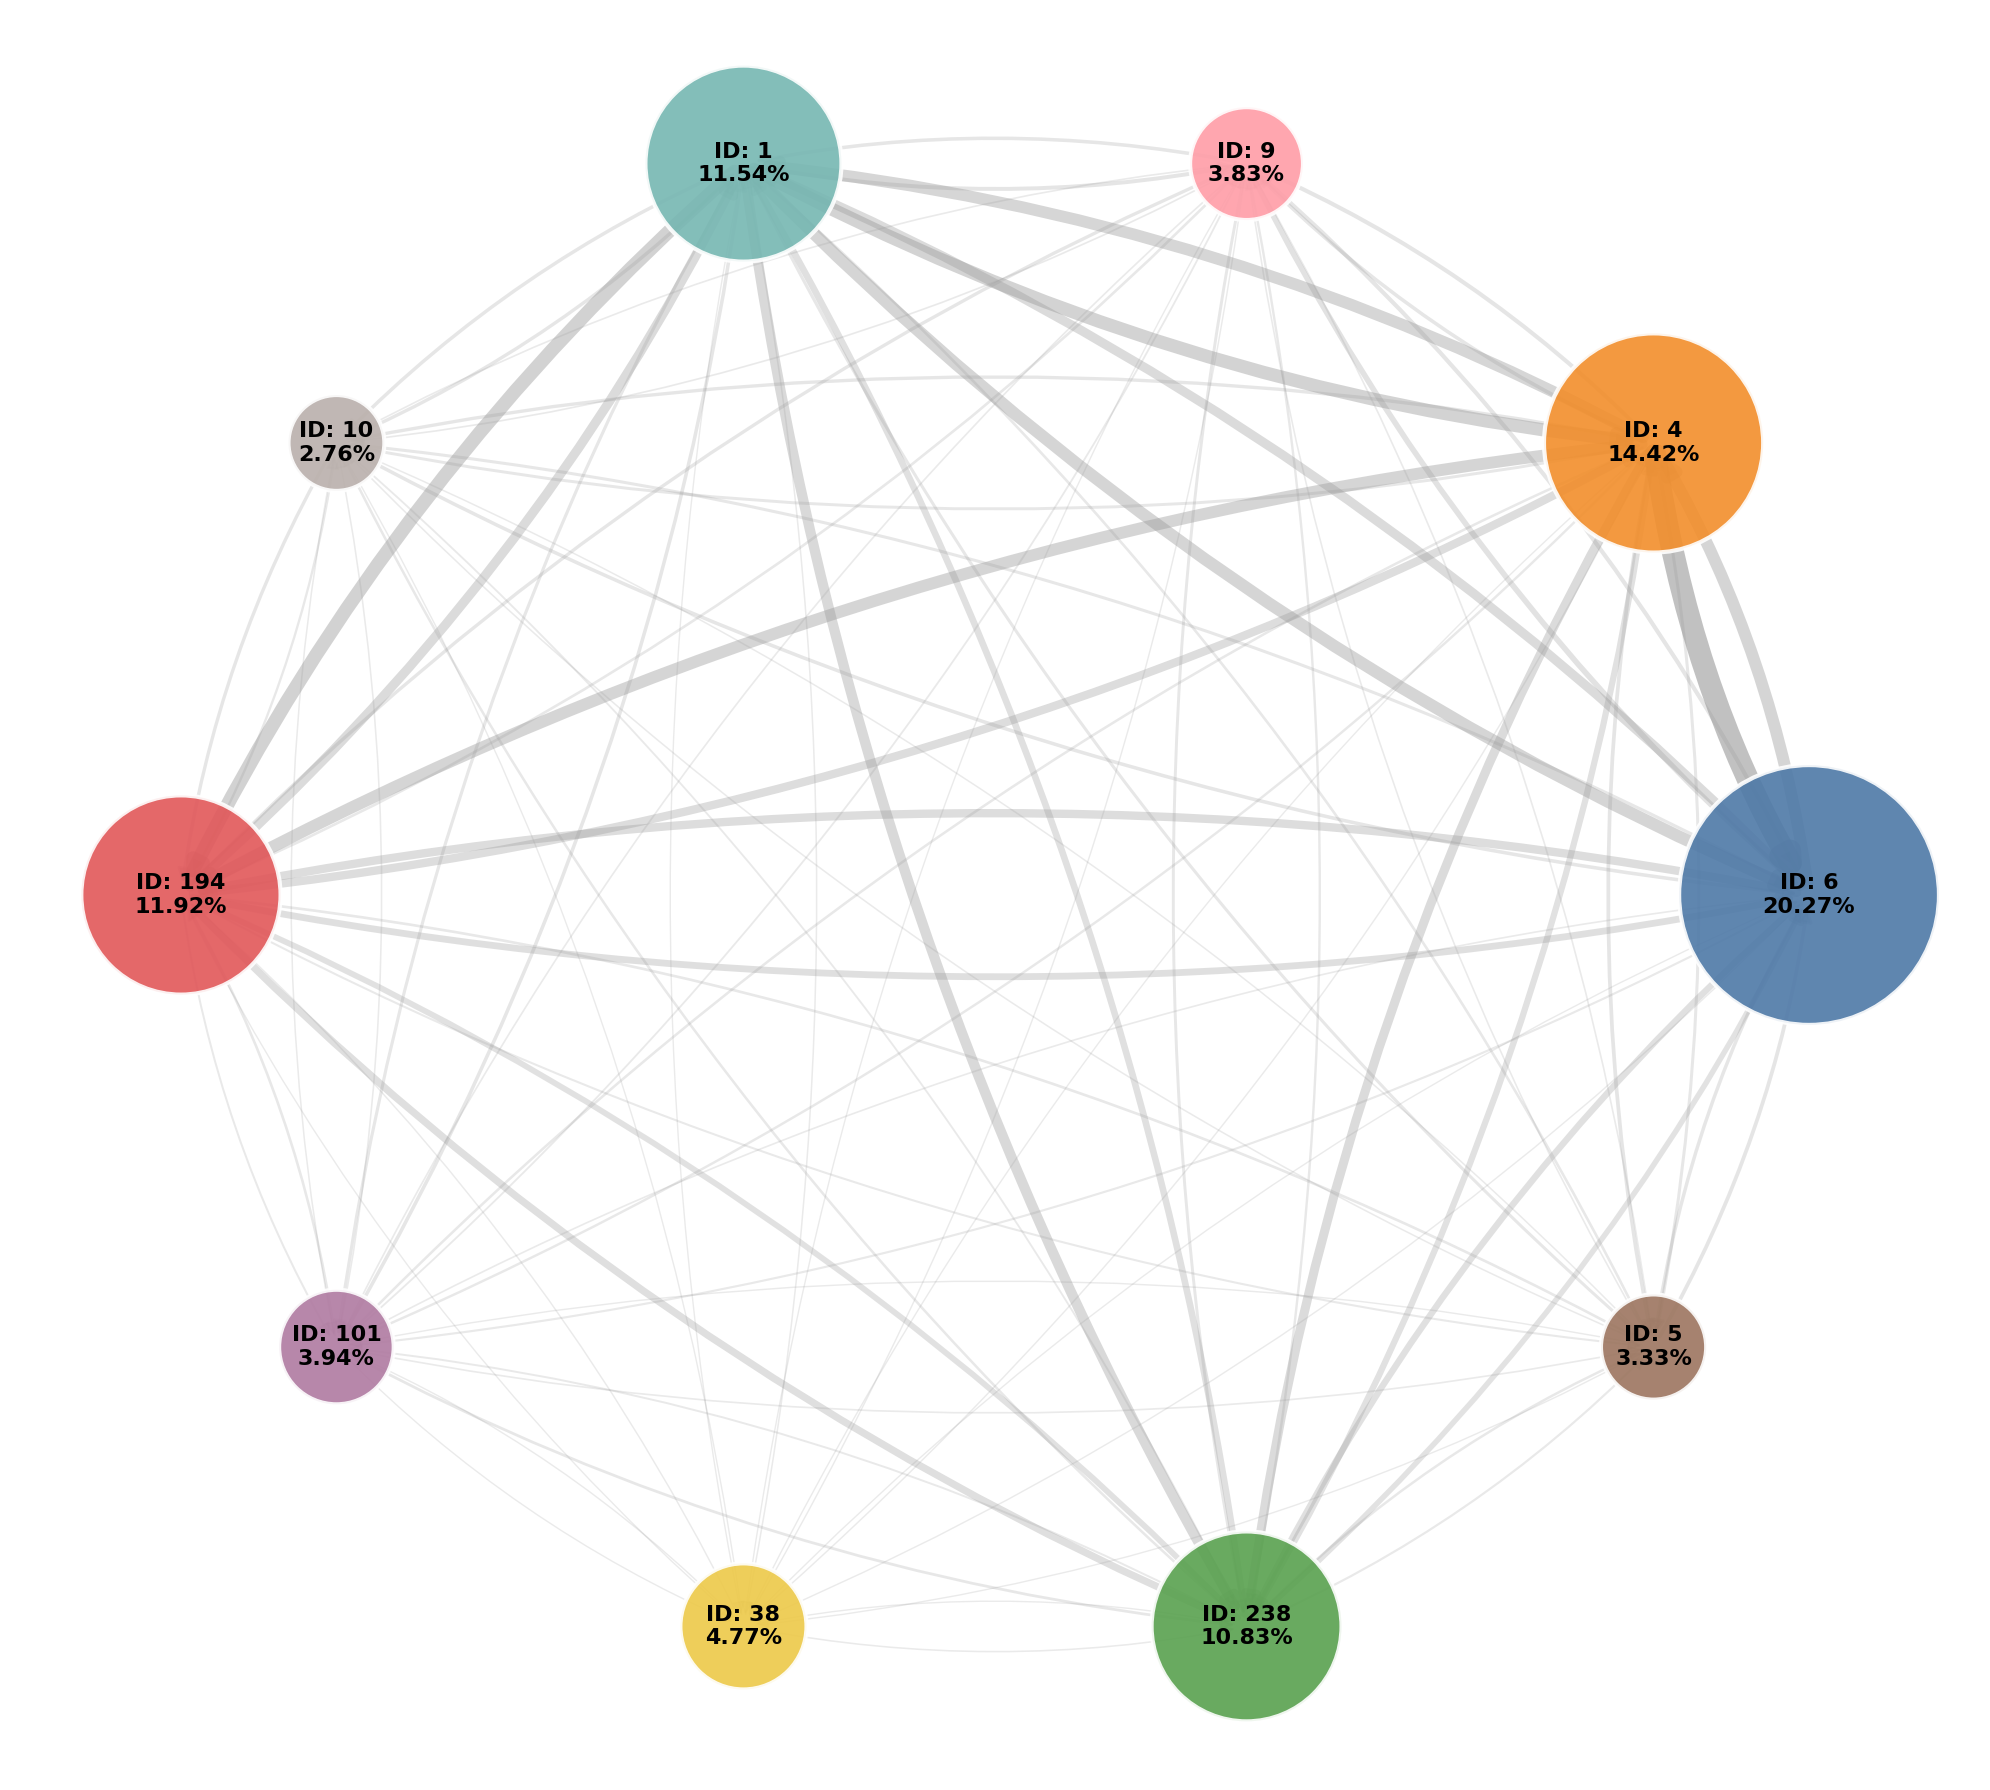

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import os

DATA_DIR = r"E:\Network Science Project\01_Louvain_method - other big files\RealData"
OUTPUT_DIR = r"E:\Network Science Project\01_Louvain_method"
GEXF_FILE = "3_abstract_community_network.gexf"
TOP_K = 10 


STACK_DETAILS = {
    '6': '20.27%',
    '4': '14.42%',
    '194': '11.92%',
    '1': '11.54%',
    '238': '10.83%',
    '38': '4.77%',
    '101': '3.94%',
    '9': '3.83%',
    '5': '3.33%',
    '10': '2.76%'
}

STACK_COLORS = {
    '6': '#4E79A7', '4': '#F28E2B', '194': '#E15759', '1': '#76B7B2', '238': '#59A14F',
    '38': '#EDC948', '101': '#B07AA1', '9': '#FF9DA7', '5': '#9C755F', '10': '#BAB0AC'
}

def plot_abstract_network_final_compact():
    file_path = os.path.join(DATA_DIR, GEXF_FILE)
    print(f"Loading abstract graph from: {file_path}")
    
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return

    G = nx.read_gexf(file_path)
    
    # 1. Filter Top 10
    node_sizes = {str(n): float(d.get('size', 0)) for n, d in G.nodes(data=True)}
    top_nodes = sorted(node_sizes, key=node_sizes.get, reverse=True)[:TOP_K]
    subG = G.subgraph(top_nodes).copy()
    
    # Canvas setup
    plt.figure(figsize=(20, 18), facecolor='white') 
    
    # 2. Layout
    pos = nx.circular_layout(subG) 
    
    # 3. Size and Color Preparation
    raw_sizes = [node_sizes[str(n)] for n in subG.nodes()]
    max_s = max(raw_sizes) if raw_sizes else 1
    draw_sizes = [(s / max_s) * 35000 for s in raw_sizes] 
    colors = [STACK_COLORS.get(str(n), '#999999') for n in subG.nodes()]
    
    # 4. Draw Edges
    edges_to_draw = []
    widths = []
    edge_colors = []
    all_weights = [float(d.get('weight', 1)) for u, v, d in subG.edges(data=True)]
    max_weight = max(all_weights) if all_weights else 1
    
    for u, v, d in subG.edges(data=True):
        weight = float(d.get('weight', 1))
        if weight > 10: 
            edges_to_draw.append((u, v))
            w_scaled = 1 + (weight / max_weight) * 15 
            widths.append(w_scaled)
            alpha = 0.2 + (weight / max_weight) * 0.4
            edge_colors.append((0.6, 0.6, 0.6, alpha)) 

    nx.draw_networkx_edges(subG, pos, edgelist=edges_to_draw, width=widths, 
                           edge_color=edge_colors, arrowsize=20, 
                           connectionstyle="arc3,rad=0.1")
    
    # Draw Nodes
    nx.draw_networkx_nodes(subG, pos, node_size=draw_sizes, node_color=colors, 
                           alpha=0.9, edgecolors='white', linewidths=3)
    
    # 5. Internal Labels (ID and Share only)
    labels_inside = {} 
    for node in subG.nodes():
        nid = str(node)
        if nid in STACK_DETAILS:
            share = STACK_DETAILS[nid]
            labels_inside[node] = f"ID: {nid}\n{share}"

    # Draw Internal Labels
    nx.draw_networkx_labels(subG, pos, labels=labels_inside, 
                            font_size=16, font_color='black', font_weight='bold') 

    # plt.title("Abstract Community Network (Top 10 Stacks)", fontsize=26, pad=30, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    
    # Save output
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
    
    output_path = os.path.join(OUTPUT_DIR, "abstract_network_id_only.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to: {output_path}")
    plt.show()

if __name__ == "__main__":
    plot_abstract_network_final_compact()

--- Visualizing Core of Stack 6 ---
Calculating layout...
Plot saved to: E:\Network Science Project\01_Louvain_method\Core dependency structure for stack 6.png


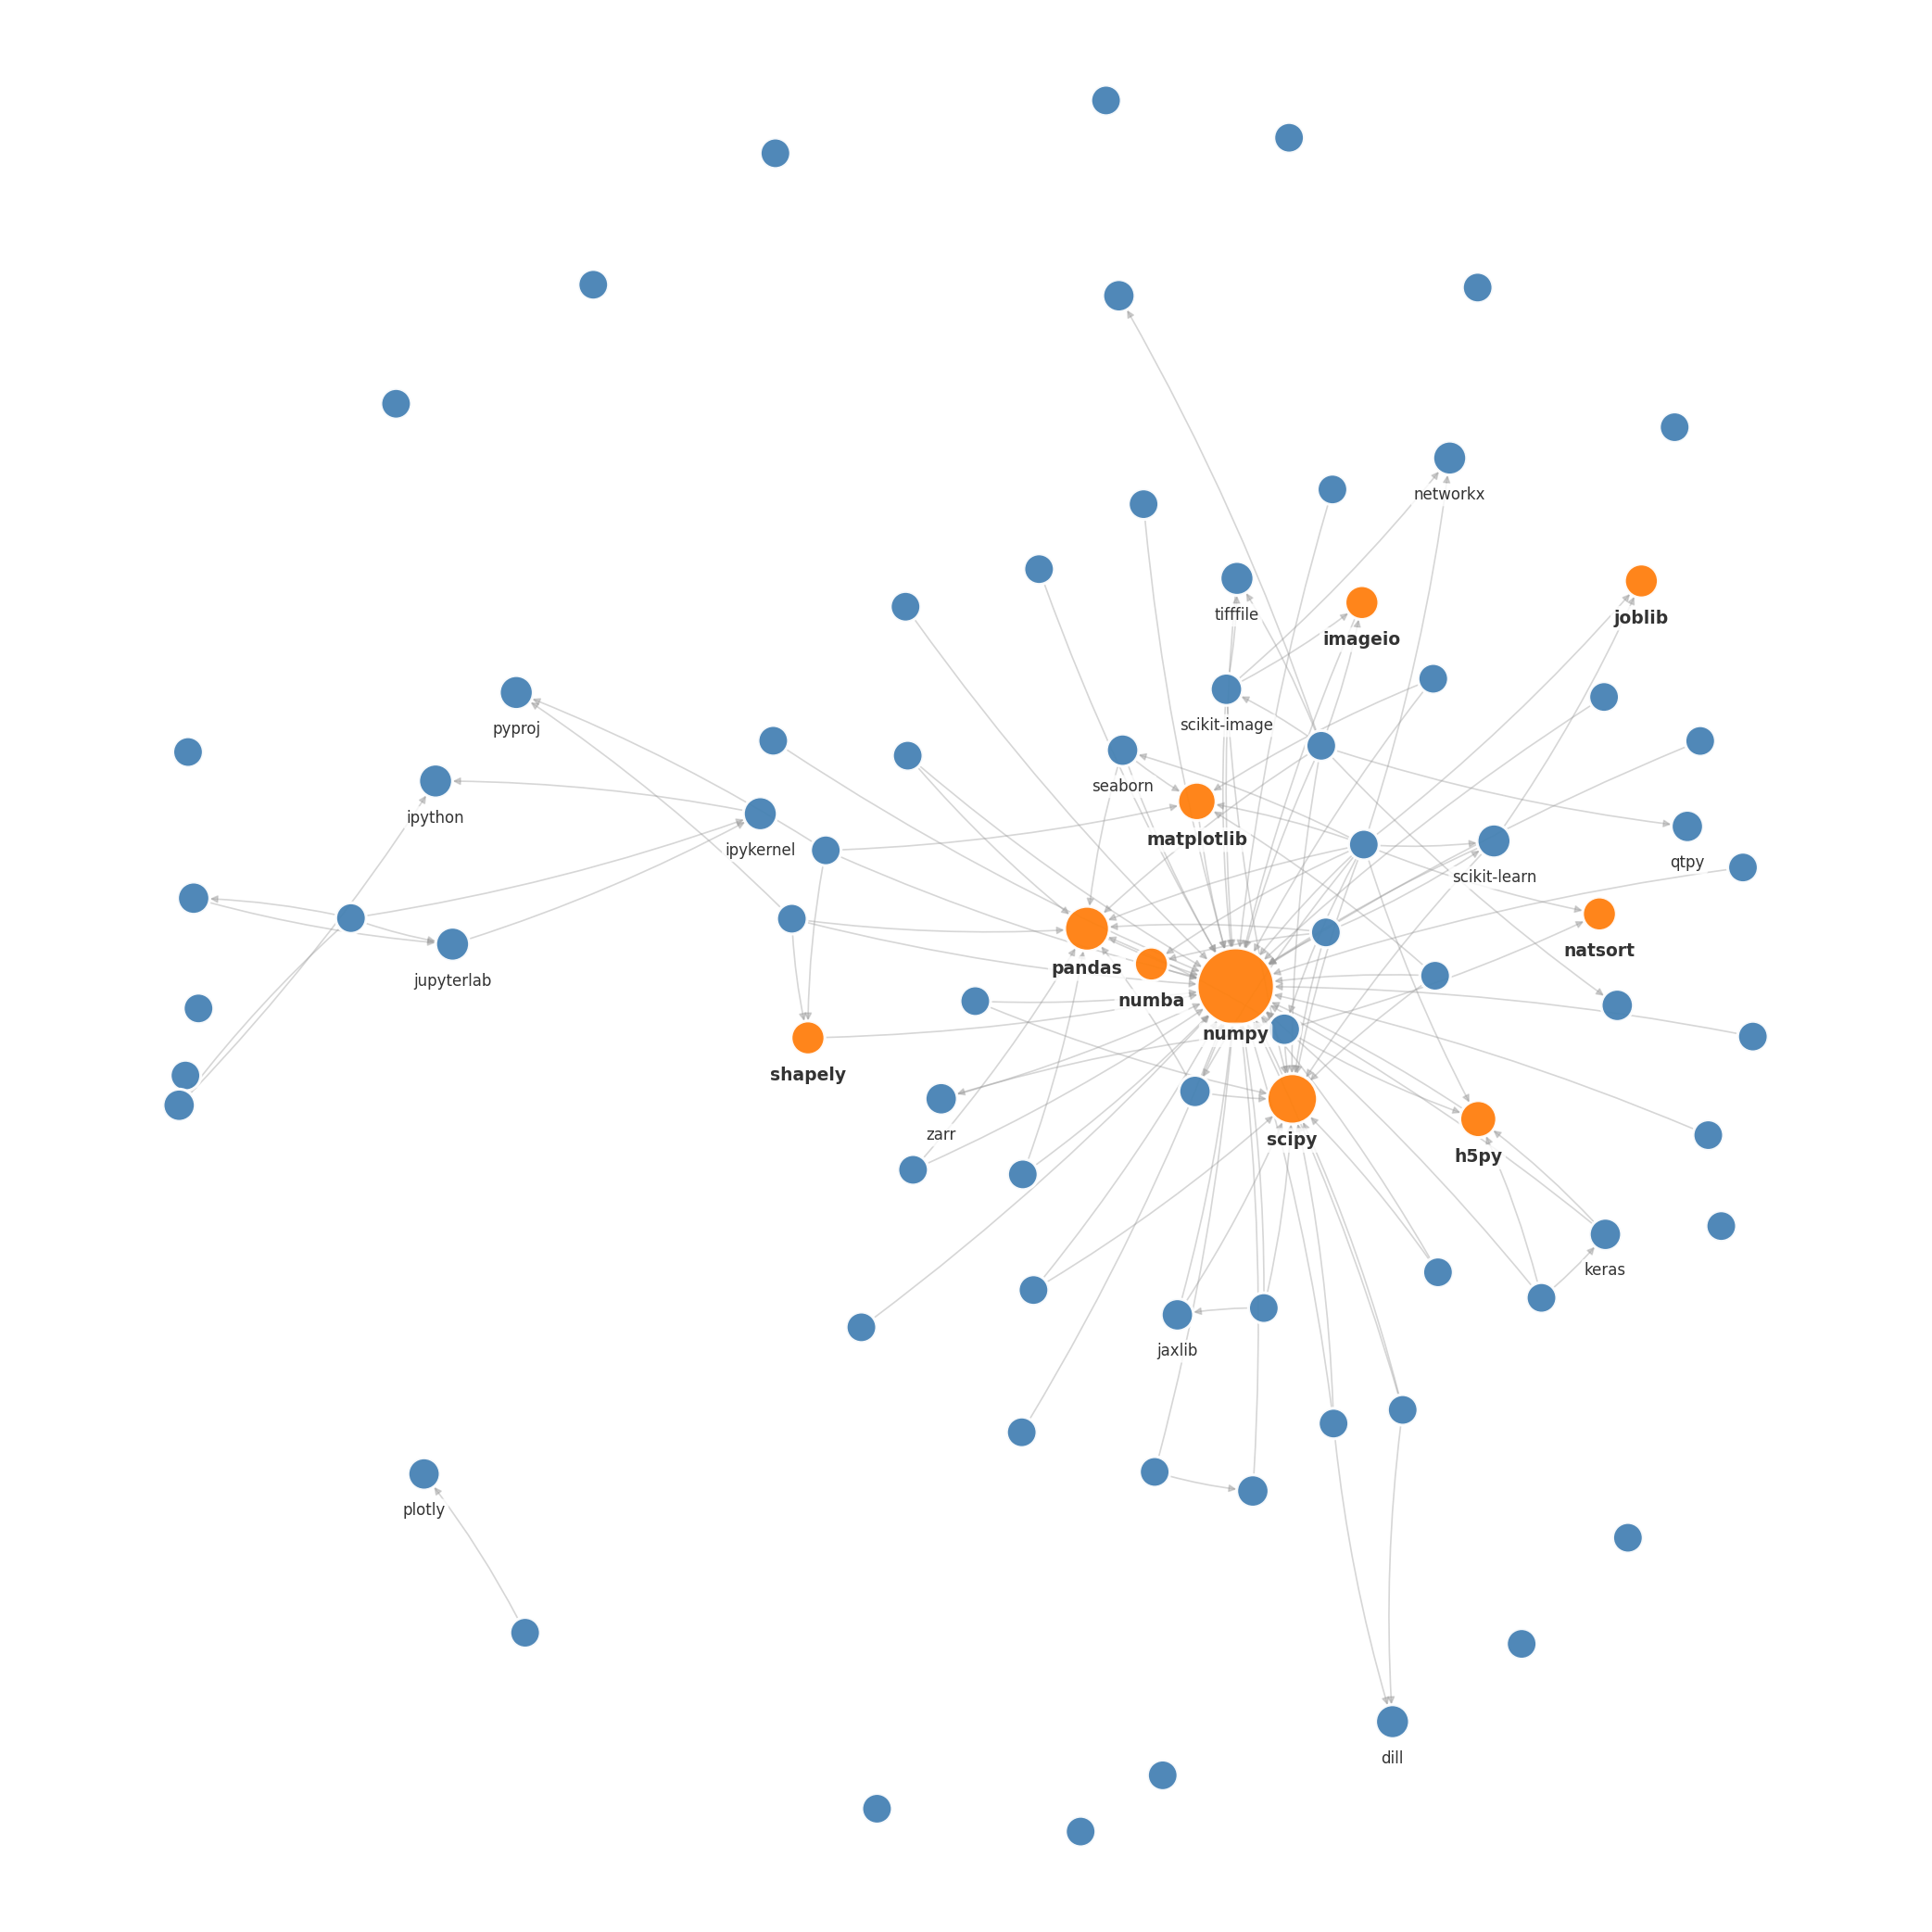

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

# ================= CONFIGURATION =================
REAL_DATA_PATH = r"E:\Network Science Project\01_Louvain_method - other big files\RealData"
EDGES_PATH = r"E:\Network Science Project\pypi_dag\edges.csv"
PARTITION_FILE = "pypi_full_partition_realdata.csv"
OUTPUT_DIR = r"E:\Network Science Project\01_Louvain_method"

TARGET_COMMUNITY_ID = 6  
TOP_N_NODES = 80
LABEL_TOP_N = 25
# =================================================

def rescale_node_sizes(degrees, min_size=300, max_size=1800):
    vals = np.array(list(degrees.values()))
    min_deg, max_deg = vals.min(), vals.max()
    
    if min_deg == max_deg:
        return {n: (min_size + max_size) / 2 for n in degrees}
    
    sizes = {}
    for node, deg in degrees.items():
        norm = (deg - min_deg) / (max_deg - min_deg)
        sizes[node] = min_size + norm * (max_size - min_size)
    return sizes

def plot_stack_core_refined():
    print(f"--- Visualizing Core of Stack {TARGET_COMMUNITY_ID} ---")
    
    try:
        part_df = pd.read_csv(os.path.join(REAL_DATA_PATH, PARTITION_FILE), dtype={'CommunityID': 'int64'})
        stack_nodes = set(part_df[part_df['CommunityID'] == TARGET_COMMUNITY_ID]['PackageName'])
        
        edges_df = pd.read_csv(EDGES_PATH)
        mask = edges_df['source'].isin(stack_nodes) & edges_df['target'].isin(stack_nodes)
        stack_edges = edges_df[mask]
        
        G_stack = nx.from_pandas_edgelist(stack_edges, create_using=nx.DiGraph())
    except Exception as e:
        print(f"Data loading error: {e}")
        return

    if len(G_stack) == 0:
        print("No nodes found.")
        return

    degrees = dict(G_stack.in_degree())
    top_core_nodes = sorted(degrees, key=degrees.get, reverse=True)[:TOP_N_NODES]
    G_core = G_stack.subgraph(top_core_nodes).copy()
    
    sub_degrees = dict(G_core.in_degree())

    print("Calculating layout...")
    pos = nx.spring_layout(G_core.to_undirected(), k=0.9, iterations=100, seed=42)

    node_size_map = rescale_node_sizes(sub_degrees, min_size=250, max_size=1600)
    node_sizes = [node_size_map[n] for n in G_core.nodes()]
    
    top_10 = set(sorted(sub_degrees, key=sub_degrees.get, reverse=True)[:10])
    node_colors = ['#ff7f0e' if n in top_10 else '#4682b4' for n in G_core.nodes()]

    plt.figure(figsize=(14, 14), dpi=150) 
    ax = plt.gca()

    nx.draw_networkx_edges(G_core, pos, 
                           edge_color='#999999', 
                           alpha=0.4, 
                           arrowsize=8, 
                           width=0.8, 
                           node_size=node_sizes, 
                           connectionstyle="arc3,rad=0.05") 

    nx.draw_networkx_nodes(G_core, pos, 
                           node_size=node_sizes, 
                           node_color=node_colors, 
                           alpha=0.95, 
                           edgecolors='white', 
                           linewidths=1.5)

    labels = {}
    top_label_nodes = sorted(sub_degrees, key=sub_degrees.get, reverse=True)[:LABEL_TOP_N]
    
    for node in top_label_nodes:
        x, y = pos[node]
        label = node
        
        is_hub = node in top_10
        font_size = 9 if is_hub else 8
        font_weight = 'bold' if is_hub else 'normal'
    
        radius_offset = 0.02 + 0.0005 * np.sqrt(node_size_map[node])
        
        plt.text(x, y - radius_offset, label, 
                 fontsize=font_size, 
                 fontweight=font_weight, 
                 color='#333333',
                 horizontalalignment='center', 
                 verticalalignment='top', 
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.8), 
                 zorder=10) 

    # plt.title(f"Core Dependency Structure: Data Science Stack\n(Top {TOP_N_NODES} Packages)", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
    
    output_file = os.path.join(OUTPUT_DIR, f"Core dependency structure for stack {TARGET_COMMUNITY_ID}.png")
    plt.savefig(output_file)
    print(f"Plot saved to: {output_file}")
    plt.show()

if __name__ == "__main__":
    plot_stack_core_refined()